# Supervised Learning: Classification


## Supervised Learning

- **Classification** is a form of data analysis that extracts models describing important data classes. 


- Such models, called **classifiers**, predict categorical (discrete, unordered) **class labels**. 
  - For example, we can build a classification model to categorize bank loan applications as either safe or risky. 

- In contrast, **regression analysis** is a statistical methodology that is most often used for **numeric prediction**


- Data classification is a two-step process, consisting of a **learning/training step** (where a classification model is constructed) and a **classification step** (where the model is used to predict class labels for given data).


- **Training Step** 
  - A tuple, X, is represented by an n-dimensional attribute vector.
  - plus a class label attribute


- Because the class label of each training tuple is provided, this step is also known as **supervised learning**
  - It contrasts with unsupervised learning (or clustering)


- **Classification/Test Step** 
  - The **accuracy** of a classifier on a given test set is the percentage of test set tuples that are correctly classified by the classifier.


# Wine dataset

Url: http://archive.ics.uci.edu/ml/datasets/Wine


These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 


The attributes are:

0. Quality (1-3)
1. Alcohol 
1. Malic acid 
1. Ash 
1. Alcalinity of ash 
1. Magnesium 
1. Total phenols 
1. Flavanoids 
1. Nonflavanoid phenols 
1. Proanthocyanins 
1. Color intensity 
1. Hue 
1. OD280/OD315 of diluted wines 
1. Proline 


In [ ]:
import numpy as np
import pandas as pd

data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df = pd.read_csv(data_url, header=None)

In [ ]:
df.head()

In [ ]:
df.describe().T

In [ ]:
df.info()

In [ ]:
# data preparation
# convert to float to have precise and homogenoues computation
dataset = df.astype(float)
print("dataset shape", dataset.shape)

# get features by removing id and class
# remove id
X = dataset.loc[:,1:]
print("X shape", X.shape)

# get class label
y = dataset.loc[:,0]
print("y shape", y.shape)

In [ ]:
X.head()

In [ ]:
y.head()

## Train vs. Test

We simulate novel/unknown instances by splitting the available data in to a **training** and a **test** set.

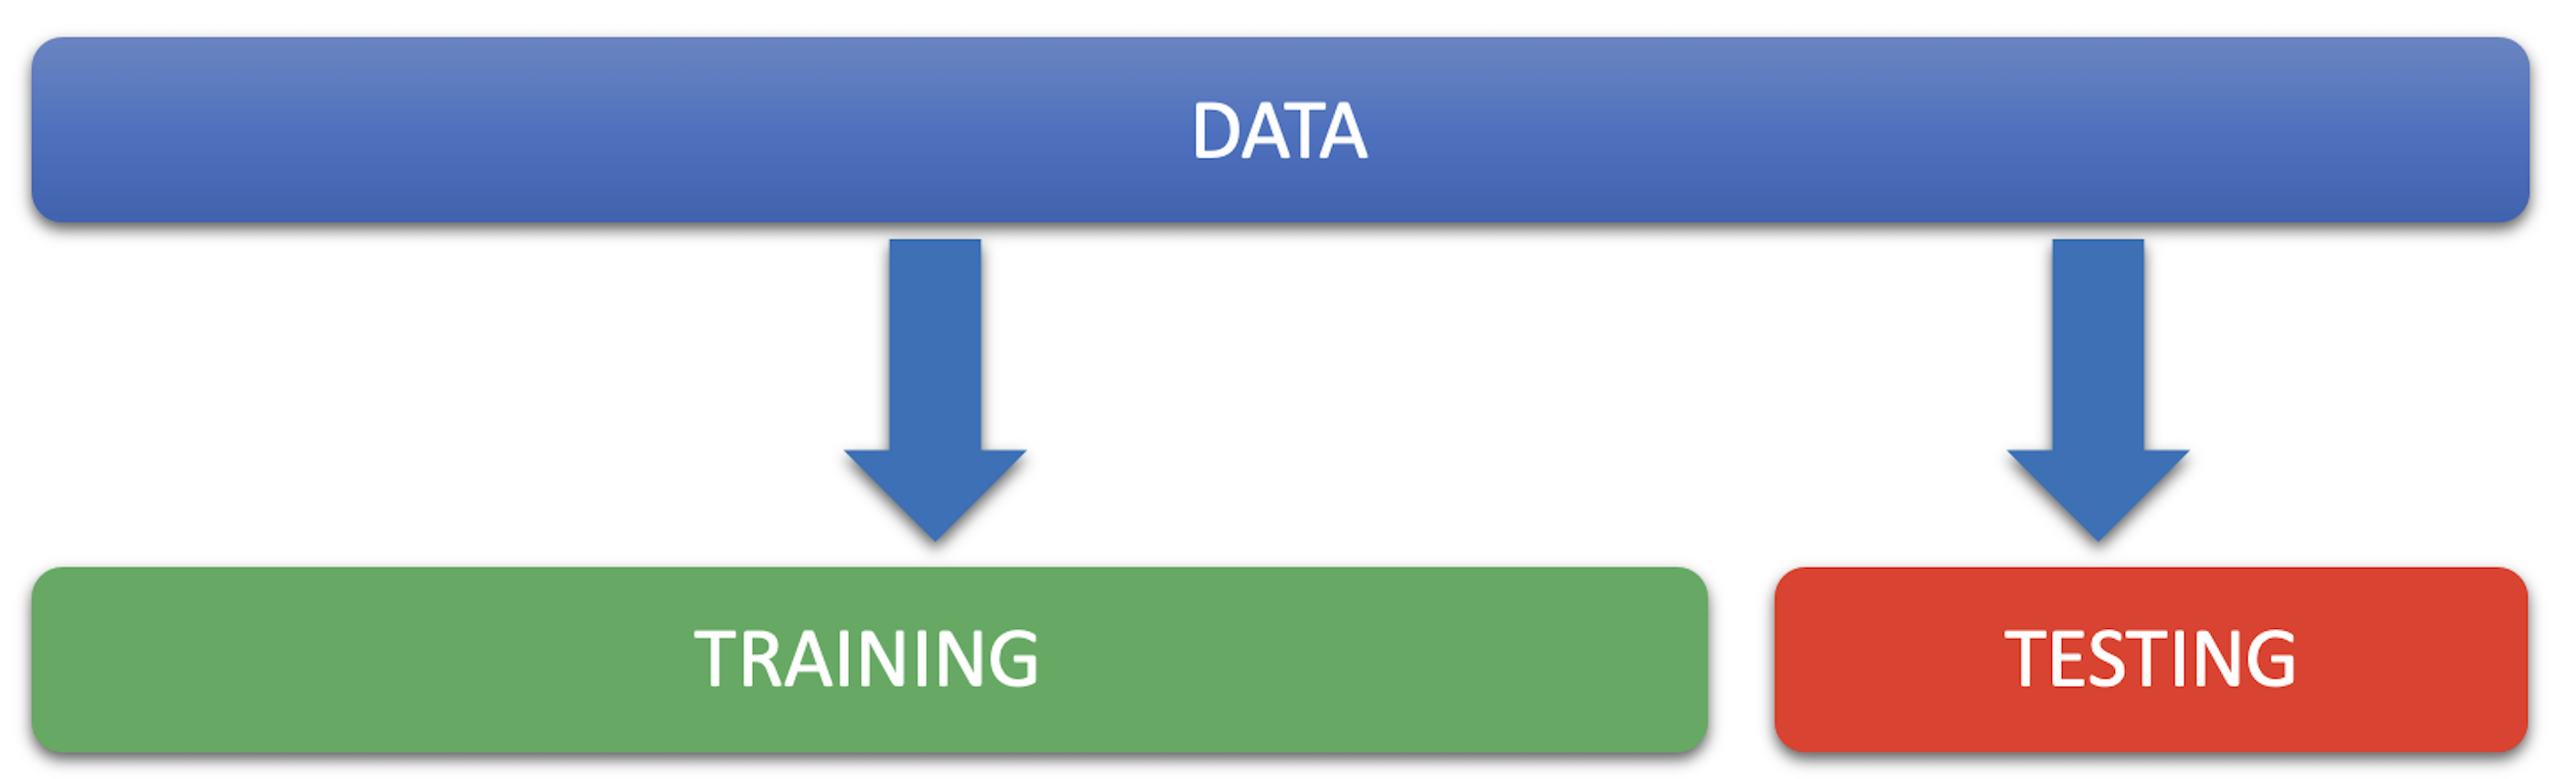

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

print (X_train.shape, X_test.shape)

## k-Nearest-Neighbor Classifiers


- lazy learner
- Nearest-neighbor classifiers are based on learning by analogy, that is, by comparing a given test tuple with training tuples that are similar to it. 
- Scikit Learn:
    - see https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
    - by default Euclidean distance is used


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create the classifier
kNN = KNeighborsClassifier(n_neighbors=10)

# Train the classifier
kNN.fit(X_train,y_train)

# Generate predictions
y_pred = kNN.predict(X_test)

# compute Accuracy
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print (f"Accuracy {acc:.3f}")

## What's the impact of k?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in range(1,11):
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train,y_train)
    y_pred = kNN.predict(X_test)

    # compute Accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    print (f"k: {k:2d} | Accuracy {acc:.3f}" )

## Choosing the value of K:   

- If K too small, sensitive to noise points   
- If K too large, it can be computationally expensive
    - what if K is very large, e.g., $+\infty$?
  
  
- **Distance weighting**:
  - weight factor, $w = 1/d^2$


- **Exercise: experiment distance weighting**
    - see https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

## How is this sensible to distances?

In [ ]:
for f in X.columns:
    print ("Feature {:2d} -> Scale: {:7.2f}".format(f, X.loc[:,f].max() - X.loc[:,f].min()) )

In [ ]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)

for k in range(1,11):
    
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit( scaler.transform(X_train), y_train )
    y_pred = kNN.predict( scaler.transform(X_test) )

    # compute Accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    print ("k: {:2d} | Accuracy {:.3f}".format(k,acc) )

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

for k in range(1,11):

    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(scaler.transform(X_train),y_train)
    y_pred = kNN.predict( scaler.transform(X_test) )

    # compute Accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    print ("k: {:2d} | Accuracy {:.3f}".format(k,acc) )

- Best scaling depends on data
  - **StandardScaler** does not remap every feature into the interval 0-1, but it depends on variance. A feature with a large variance may strongly impact on the overall distance
  - **MinMaxScaling** is usually more sensitive to outliers, but weights features more evenly
- Euclidean Distance assumes all features are equally important, and this is usually not the case


## It might be a good idea to weigh features according to some domain knowledge

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

def my_distance(a,b):
    return 10*abs(a[0]-b[0]) + abs(a[1]-b[1])

for k in range(1,11):
    
    kNN = KNeighborsClassifier(n_neighbors = k, 
                                         metric = my_distance)
    kNN.fit( X_train ,y_train)
    y_pred = kNN.predict( X_test )

    # compute accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    print ("k: {:2d} | Accuracy {:.3f}".format(k,acc) )    

<div class="alert alert-warning" role="alert">

## Computational Complexity

- $O(k \log N)$ with multi-dimensional search trees
- Additional speed-up with
  - cluster-based pre-filtering

</div>     



# Let's wrap-up with 2-dimensional data

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

N_SAMPLES = 1000
N_CENTERS = 4

# create a random dataset
X, labels_true = make_blobs(n_samples=N_SAMPLES, 
                            centers=N_CENTERS, cluster_std=1, 
                            random_state=22222222)
transformation = [[0.6, -0.6], [-0.4, 0.9]]
X = np.dot(X, transformation)

X_train, X_test, y_train, y_test = train_test_split(X, labels_true, 
                                                    test_size=0.33, 
                                                    random_state=42)

kNN = KNeighborsClassifier(n_neighbors=10)    
kNN.fit( X_train, y_train )
y_pred = kNN.predict( X_test )

# compute accuracy
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print ("k: {:2d} | Accuracy {:.3f}".format(k,acc) )    
    
# plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.1)
ax.scatter(X_test[:,0], X_test[:,1], c=y_pred, marker='+');

Let's show the decision boundary

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

N_SAMPLES = 1000
N_CENTERS = 4

# create a random dataset
X, labels_true = make_blobs(n_samples=N_SAMPLES, 
                            centers=N_CENTERS, cluster_std=1, 
                            random_state=22222222)
transformation = [[0.6, -0.6], [-0.4, 0.9]]
X = np.dot(X, transformation)

X_train, X_test, y_train, y_test = train_test_split(X, labels_true, 
                                                    test_size=0.33, 
                                                    random_state=42)

# Try changing the number of neighbours
kNN = KNeighborsClassifier(n_neighbors=10)    
kNN.fit( X_train ,y_train)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
zz = [ [xx,yy] for xx in np.linspace(x_min, x_max, 40) 
               for yy in np.linspace(y_min, y_max, 40) ]
zz = np.array(zz)
z_labels = kNN.predict(zz)

# plot
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(zz[:,0], zz[:,1], c=z_labels, marker='+', alpha=0.3)

ax.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.3);

# Decision Trees


# A non linearly separable dataset

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# create a (quasi)random dataset
N_SAMPLES = 1000
N_CENTERS = 4
X, y = make_blobs(n_samples=N_SAMPLES, 
                  centers=[[0,0], [0,1], [1,0], [1,1]], 
                  cluster_std=0.15, random_state=4)
y[y==3]=0
y[y==2]=1

# plot
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3);

## What's a decision tree

 - see see: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)

In [ ]:
from sklearn.tree import plot_tree

f_names = ["Feature 1", "Feature 2"]
c_names = ["Class 0","Class 1"]

fig, ax = plt.subplots(figsize=(20,10))
plot_tree(model, ax=ax,
         feature_names=f_names, class_names=c_names,  
                                filled=True, rounded=True);

In [ ]:
def model_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    zz = [ [xx,yy] for xx in np.linspace(x_min, x_max, 40) 
                   for yy in np.linspace(y_min, y_max, 40) ]
    zz = np.array(zz)
    z_labels = model.predict(zz)

    plt.figure()
    plt.scatter(zz[:,0], zz[:,1], c=z_labels, marker='+', alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, alpha=0.6)

model_decision_boundary(model, X, y)

# Wine dataset

Url: http://archive.ics.uci.edu/ml/datasets/Wine?ref=datanews.io


These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 


The attributes are:
1. Quality (1-3)
1. Alcohol 
1. Malic acid 
1. Ash 
1. Alcalinity of ash 
1. Magnesium 
1. Total phenols 
1. Flavanoids 
1. Nonflavanoid phenols 
1. Proanthocyanins 
1. Color intensity 
1. Hue 
1. OD280/OD315 of diluted wines 
1. Proline 


In [ ]:
import numpy as np
import pandas as pd

data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df = pd.read_csv(data_url, header=None)

In [ ]:
# data preparation
# convert to float to have precise and homogenoues computation
dataset = df.astype(float)
print("dataset shape", dataset.shape)

# get features by removing id and class
# remove id
X = dataset.loc[:,1:]
print("X shape", X.shape)

# get class label
y = dataset.loc[:,0]
print("y shape", y.shape)

## Let's build a  tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)

In [ ]:
from sklearn.tree import plot_tree

f_names = ["Alcohol","Malic acid", "Ash", "Alcalinity", "Magnesium", "Phenols",
            "Flavanoids", "Nonflavanoid", "Proanthocyanins", "Color", "Hue", "ODs", "Proline"]

c_names = ["Quality 1","Quality 2","Quality 3"]

fig, ax = plt.subplots(figsize=(20,10))
plot_tree(model, ax=ax,
         feature_names=f_names, class_names=c_names,  
                                filled=True, rounded=True);

## Decision Trees

- Recursive Algorithm
- Select the best split and partition the dataset
- Partitioning Scenarios: **k-ary tree, binary tree, categorical, ordinal, numerical**
- Recursion ends when a node is pure or no further splitting is possible
  - other constraints can be enforced

## Let's focus on *binary* decision tree for *classification*

## Algorithm Sketch


<div class="alert alert-info">

**BuildTree**(${\cal D}$):

1. *BestSplit*, *BestGain* = *None*
1. **For each** feature $f$
1. $\quad$ **For each** threshold $t$
1. $\quad\quad$ *Gain* $\gets$ goodness of the split $(f \leq t)$
1. $\quad\quad$ **If** Gain>=BestGain:
1. $\quad\quad\quad$ *BestGain* $\gets$ *Gain*
1. $\quad\quad\quad$ BestSplit* $\gets$ $(f \leq t)$
1. **If** *BestGain*$=0$ or *other stopping criterion is met*:
1. $\quad$ $\mu \gets$ the best prediction for ${\cal D}$
1. $\quad$ **Return** $Leaf(\mu)$
1. Let $f$ and $t$ be those of BestSplit = $(f \leq t)$
1. ${\cal D}_L \gets \{x \in {\cal D} ~|~ x_f\leq t\}$ *(Left Partition)*
1. $L \gets$  **BuildTree**(${\cal D}_L$) *(Left Child)*
1. ${\cal D}_R \gets \{x \in {\cal D} ~|~ x_f > t\}$ *(Right Partition)*
1. $R \gets$  **BuildTree**(${\cal D}_R$) *(Right Child)*
1. **Return** $Node(L,R)$
</div>


It is a greedy algorithm (without backtracking, i.e., decisions are not changed) that maximizes the Gain at every step.

## Driving Factor

We let the design of our algorithm be driven by the quality measure adopted.

For classification, we adopt **error** $E$, that is the fraction of misclassified instances.

## Leaf Node

- Given a dataset ${\cal D}$ what is the best prediction we can have?

$$\mu = \arg\min\limits_{\mu} Error({\cal D}, \mu)= \arg\min\limits_{\mu} \frac{1}{|{\cal D}|} \sum\limits_{(x,y) \in {\cal D}} E(y, \mu)$$
   - where $ E(y, \mu)$ is 0 if $\mu=y$ and 1 otherwise

- for the classification task, it holds that $\mu$ must be the most frequent label in ${\cal D}$

- if we denote with $p_i$ the frequency of label $l_i$ in ${\cal D}$, we can write that total error 
on the dataset is:
$$
Error({\cal D}) = 1 - \max_i p_i
$$
  - Maximum: $(1 - 1/m)$, where $m$ is the number of classes, when records are equally distributed among all classes, implying least interesting information
  - Minimum: (0.0) when all records belong to one class, implying most interesting information (*pure leaf*)

- Hereinafter we denote with $Error({\cal D})$ the error of the best prediction $\mu$ for dataset ${\cal D}$.


## Internal Node

- Given the pair $f \leq t$, we must determine the quality of this split.

- In general, assuming $Error$ is an average measure, we denote the gain of a split as the error reduction with respect to not splitting the node.

$$
Gain(f,t~|~{\cal D}) = Error({\cal D}) - \left(\frac{|{\cal D}_L|}{|{\cal D}|} Error({\cal D}_L) + \frac{|{\cal D}_R|}{|{\cal D}|} Error({\cal D}_R) \right)
$$

- We would like Gain>0, note that Gain cannot decrease.


## Let's make an example

| ${\cal D}$ | |
|-|-|
|Class 0 | Class 1 |
| 400    |  400    |

| Splitting A | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| vs. | Splitting B | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
|-|-|-|-|-|-|-|-|-|
| ${\cal D}_L$ | | ${\cal D}_R$ | |     | ${\cal D}_L$ | | ${\cal D}_R$ | |
|Class 0 |  Class 1 |Class 0 | Class 1 | |Class 0 | Class 1 |Class 0 | Class 1 |
| 300    |  100    | 100    |  300    | | 200    |  400    | 200    |  0    |
| $p_0=3/4$ | ${p_1=1/4}$ | $p_0=1/4$ | $p_1=3/4$ | | $p_0= 1/3$ | $p_1= 2/3$ | $p_0= 1$ | $p_1= 0$ |




- Suppose $|{\cal D}|$ has 400 instances in class 0 and 400 instances in class 1, denoted with ${\cal D}=(400,400)$
   - $Error({\cal D}) = 0.5$
   

- Suppose Splitting $A=(f_1, t_1)$ produces ${\cal D}_L=(300,100)$ and ${\cal D}_R=(100,300)$:
   - $Gain(A|~{\cal D}) = 0.5 - 400/800 * (1- 3/4) - 400/800 *(1-3/4) = 0.25$
   
   
- Suppose Splitting $B=(f_2, t_2)$ produces ${\cal D}_L=(200,400)$ and ${\cal D}_R=(200,000)$:
   - $Gain(B|~{\cal D}) = 0.5 - 600/800 * (1- 2/3) - 200/800 *(1-1) = 0.25$
   
   
- The two splits are equally good, one of them is picked at random



- Indeed, we would like to consistently prefer $B$ as it produces one *pure* child, i.e., a set of instances with perfect prediction that needs not to be processed recursively.

## Information Gain
### ( ID3 - Iterative Dichotomiser )


The error of a dataset is measured as the entropy of its labels distributions

$$
Error({\cal D}) = Info({\cal D}) = -\sum\limits_i p_i\log_2 ( p_i )
$$
   - where $p_i$ is the probability/frequency of label $i$
   - This is indeed the **entropy**, i.e., a measure of the randomness of the labels
   - Maximum: $\log m$, where $m$ is the number of classes, when records are equally distributed among all classes implying least information
   - Minimum: 0.0 when all records belong to one class, implying most information (assume $0\log 0=0$)



## Let's make an example

- Suppose $|{\cal D}|$ has 400 instances in class 0 and 400 instances in class 1, denote with ${\cal D}=(400,400)$
   - $Error({\cal D}) = - 1/2 \log(1/2) - 1/2 \log(1/2) = \log(2) = 1$
   

- Suppose Splitting $A=(f_1, t_1)$ produces ${\cal D}_L=(300,100)$ and ${\cal D}_R=(100,300)$:
   - $Gain(A|~{\cal D}) = 1 - 400/800 * ( - 3/4 \log(3/4) - 1/4 \log(1/4)) - 400/800 *( - 1/4 \log(1/4) - 3/4 \log(3/4)) \approx 0.19$
   
   
- Suppose Splitting $B=(f_2, t_2)$ produces ${\cal D}_L=(200,400)$ and ${\cal D}_R=(200,000)$:
   - $Gain(B|~{\cal D}) = 1 - 600/800 * (- 1/3 \log(1/3) -2/3 \log(2/3)) - 200/800 *(- 1 \log(1) -0 \log(0)) \approx 0.31$
   
   
- Largest Gain is for split B!

## Gain Ratio

### ( C4.5 Algorithm )

- For k-ary decision trees (instead of binary), Information Gain favors splits with several small partitions
  - they are more likely to be pure
  

- Gain Ration normalizes the Information Gain by the SplitInfo of a k-way splitting:
$$
SplitInfo({\cal D}) =  -\sum\limits_{i=1}^k \frac{|{\cal D}_i|}{|{\cal D}|} \log \left(\frac{|{\cal D}_i|}{|{\cal D}|}\right) 
$$
  - this is analogous to the information gain, but related to the partitioning instead of the labels
  - large values of $k$ (complex partitionings) receive a large score
  
  
  
- The Gain Ratio is formalized as:
$$
Error({\cal D}) = GainRatio({\cal D}) = \frac{Info({\cal D})}{SplitInfo({\cal D})}
$$

## GINI Index

### ( CART - Classification and Regression Trees)

GINI is a measure of statistical dispersion developed by the Italian statistician and sociologist Corrado Gini (the index was published in 1912).

$$
Error({\cal D}) = Gini({\cal D}) = 1-\sum\limits_i p_i^2
$$

  - Maximum: $(1 - 1/m)$ when records are equally distributed among all classes, implying least interesting information
  - Minimum: (0.0) when all records belong to one class, implying most interesting information

## Let's make an example

- Suppose $|{\cal D}|$ has 400 instances in class 0 and 400 instances in class 1, denote with ${\cal D}=(400,400)$
   - $Error({\cal D}) = 1 - (1/2)^2 - (1/2)^2 = 0.5$
   

- Suppose Splitting $A=(f_1, t_1)$ produces ${\cal D}_L=(300,100)$ and ${\cal D}_R=(100,300)$:
   - $Gain(A|~{\cal D}) = 0.5 - 400/800 * ( 1 - (3/4)^2 - (1/4)^2) - 400/800 *(1- (1/4)^2 - (3/4)^2) = 0.125$
   
   
- Suppose Splitting $B=(f_2, t_2)$ produces ${\cal D}_L=(200,400)$ and ${\cal D}_R=(200,000)$:
   - $Gain(B|~{\cal D}) =  0.5 - 600/800 * ( 1 - (1/3)^2 - (2/3)^2) - 200/800 *(1- (1)^2 - (0)^2) \approx 0.167$
   
   
- Largest Gain is for split B!

## Exercise: Compare gini vs. information gain on a train/test split



See documentation for the `criterion` parameter:
  - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

# Decision tree on multiple classes

Try a different number of clusters and leaves

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# create a (quasi)random dataset
N_SAMPLES = 1000
N_CENTERS = 6
X, y = make_blobs(n_samples=N_SAMPLES, 
                  centers=N_CENTERS, 
                  cluster_std=0.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# train and predict
dt = DecisionTreeClassifier(max_leaf_nodes=6) # change this!
dt.fit(X_train,y_train)

# compute Accuracy
train_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
test_acc  = accuracy_score(y_true = y_test,  y_pred = dt.predict(X_test))
print ("Train Accuracy: {:.3f} - Test Accuracy: {:.3f}".format(train_acc,test_acc) )

model_decision_boundary(dt, X_test, y_test)

## Stopping Criteria: max leaf nodes

The number of leaves affects the model expressiveness.

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = make_moons(n_samples=1000, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# train and predict
dt = DecisionTreeClassifier(max_leaf_nodes=2) # change this!
dt.fit(X_train,y_train)

model_decision_boundary(dt, X_test, y_test)


In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=1000, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

for max_leaves in range(2,50):
    # train and predict
    dt = DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
    test_acc  = accuracy_score(y_true = y_test,  y_pred = dt.predict(X_test))
    print ("Train Accuracy: {:.3f} - Test Accuracy: {:.3f}".format(train_acc,test_acc) )

## Stopping Criteria: maximum depth

The number of leaves affects the model expressiveness.

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=1000, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# train and predict
dt = tree.DecisionTreeClassifier(max_depth=2) # change this!
dt.fit(X_train,y_train)

model_decision_boundary(dt, X_test, y_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=1000, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

for max_depth in range(1,20):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
    test_acc  = accuracy_score(y_true = y_test,  y_pred = dt.predict(X_test))
    print ("Train Accuracy: {:.3f} - Test Accuracy: {:.3f}".format(train_acc,test_acc) )

## Tuning of the tree

The power of the tree can be tuned with the following constraints:

- **max_depth**: The maximum depth of the tree. 

- **min_samples_split**: The minimum number of samples required to split an internal node

- **min_samples_leaf**: The minimum number of samples required to be at a leaf node.

- **max_leaf_nodes**: The maximum number of trees.

- **min_impurity_decrease**: The minimum gain for allowing a split.

- **min_impurity_split**: The minim error for allowing a split.

In conjunction with the above constraints most implementations implement a smarter growing strategy. 
Indeed, if we are limited in the number of nodes, then growing order makes a difference.
In this case, it is useful to evaluate the gain provided by splitting all of the tree leaves, and 
then split the leaf the provides the maximum gain.

## Algorithm Sketch 

Non-recursive, best split first

<div class="alert alert-info">
    
BuildTree(${\cal D}$):
1. $Tree \gets \emptyset$
1. $(f \leq t) \gets $  best split of ${\cal D}$
1. *Gain* $\gets$ goodness of the split $(f \leq t)$
1. $Queue \gets \langle gain,(f\leq t),{\cal D}\rangle$
1. **While** $Queue \neq \emptyset$ and *no other stopping criterion is met*:
1. $\quad$ $\langle gain, (f \leq t), {\cal D}^*\rangle \gets Queue$.pop_max()
1. $\quad$ Add node $(f \leq t)$ to $Tree$ at the leaf corresponding to ${\cal D}^*$
1. $\quad$ *(Left Partition)* 
1. $\quad$ ${\cal D}_L \gets \{x \in {\cal D} ~|~ x_f\leq t\}$ 
1. $\quad$ $(f \leq t) \gets $  best split of ${\cal D}_L$
1. $\quad$ *Gain* $\gets$ goodness of the split $(f \leq t)$
1. $\quad$ $Queue$.push( $\langle gain,(f\leq t),{\cal D}_L\rangle$ )
1. $\quad$ *(Right Partition)* 
1. $\quad$ ${\cal D}_R \gets \{x \in {\cal D} ~|~ x_f> t\}$ 
1. $\quad$ $(f \leq t) \gets $  best split of ${\cal D}_R$
1. $\quad$ *Gain* $\gets$ goodness of the split $(f \leq t)$
1. $\quad$ $Queue$.push( $\langle gain,(f\leq t),{\cal D}_R\rangle$ )
1. **Return** $Tree$

</div>

## Regression


- Decision trees can be used also for regression problems.


- We must use the proper quality/cost function.


- For regression, the cost function is Mean Squared Error(MSE):

$$
Error(tree, {\cal D}) = MSE(tree, {\cal D}) =  \frac{1}{|{\cal D}|} \sum\limits_{(x,y)\in {\cal D}} (tree(x)- y)^2
$$


## Leaf Node

- Given a dataset ${\cal D}$ what is the best prediction we can have?

- $\mu = \arg\min MSE(\mu, {\cal D})\quad \Rightarrow\quad \mu =  \frac{1}{|{\cal D}|} \sum\limits_{(x,y)\in {\cal D}} y$

- for the regression task, it holds that $\mu$ must be the average value of the labels in ${\cal D}$

- Given $\mu$, we can write that total error on the dataset is:
$$
Error({\cal D}) =  \frac{1}{|{\cal D}|} \sum\limits_{(x,y)\in {\cal D}} (\mu - y)^2
$$

- Hereinafter we denote with $Error({\cal D})$ the error of the best prediction for dataset ${\cal D}$.


## Internal Node

- Given the pair $f \leq t$, we must determine the quality of this split.

- In general, assuming $Error$ is an average measure, we denote the gain of a split as the error reduction w.r.t. to not splitting the node.

$$
Gain(f,t~|~{\cal D}) = Error({\cal D}) - \frac{|{\cal D}_L|}{|{\cal D}|} Error({\cal D}_L) - \frac{|{\cal D}_R|}{|{\cal D}|} Error({\cal D}_R)
$$

- We would like Gain>0, note that Gain cannot decrease.


## Regression Problem

In [ ]:
from sklearn.datasets import load_boston
data = load_boston()

In [ ]:
print (data['DESCR'])

In [ ]:
X = data.data
y = data.target

print (X.shape)
print (y.shape)
print (data.feature_names)

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

errors = []

for max_leaves in range(2,100):
    # train and predict
    dt = DecisionTreeRegressor(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = mean_squared_error(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc  = mean_squared_error(y_true=y_test,  y_pred=dt.predict(X_test))

    errors += [ [max_leaves, train_acc, test_acc] ]

errors = np.array(errors)

fig, ax = plt.subplots()
ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
ax.plot(errors[:,0], errors[:,2], "o-", label="Test")
ax.set_ylabel("MSE")
ax.set_xlabel("Number of Leaves")
ax.grid()
ax.legend();


In [ ]:
# Train a linear regression

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

reg_train_err = mean_squared_error(y_true=y_train, y_pred=reg.predict(X_train))
reg_test_err  = mean_squared_error(y_true=y_test,  y_pred=reg.predict(X_test))


In [ ]:
# Comparison plot

fig, ax = plt.subplots()
ax.plot(errors[:,0], errors[:,1], "x:", label="DT Train")
ax.plot(errors[:,0], errors[:,2], "o-", label="DT Test")
ax.axhline(y=reg_train_err, c='red', ls="--", label="Reg Train")
ax.axhline(y=reg_test_err, c='green', ls="--", label="Reg Test")
ax.set_ylabel("MSE")
ax.grid()
ax.legend();

## References

- **Introduction to Data Mining (Second Edition)**. , Kumar et al.
  - Chapter 4: Classification: Basic Concepts, Decision Trees, and Model Evaluation
    - until 4.3 included
  - Section 5.2: Nearest-Neighbor classifiers


- **Python Data Science Handbook**. O’Reilly. 2016
  - Chapter 5: Machine Learning - Introducing Scikit-Learn
  
